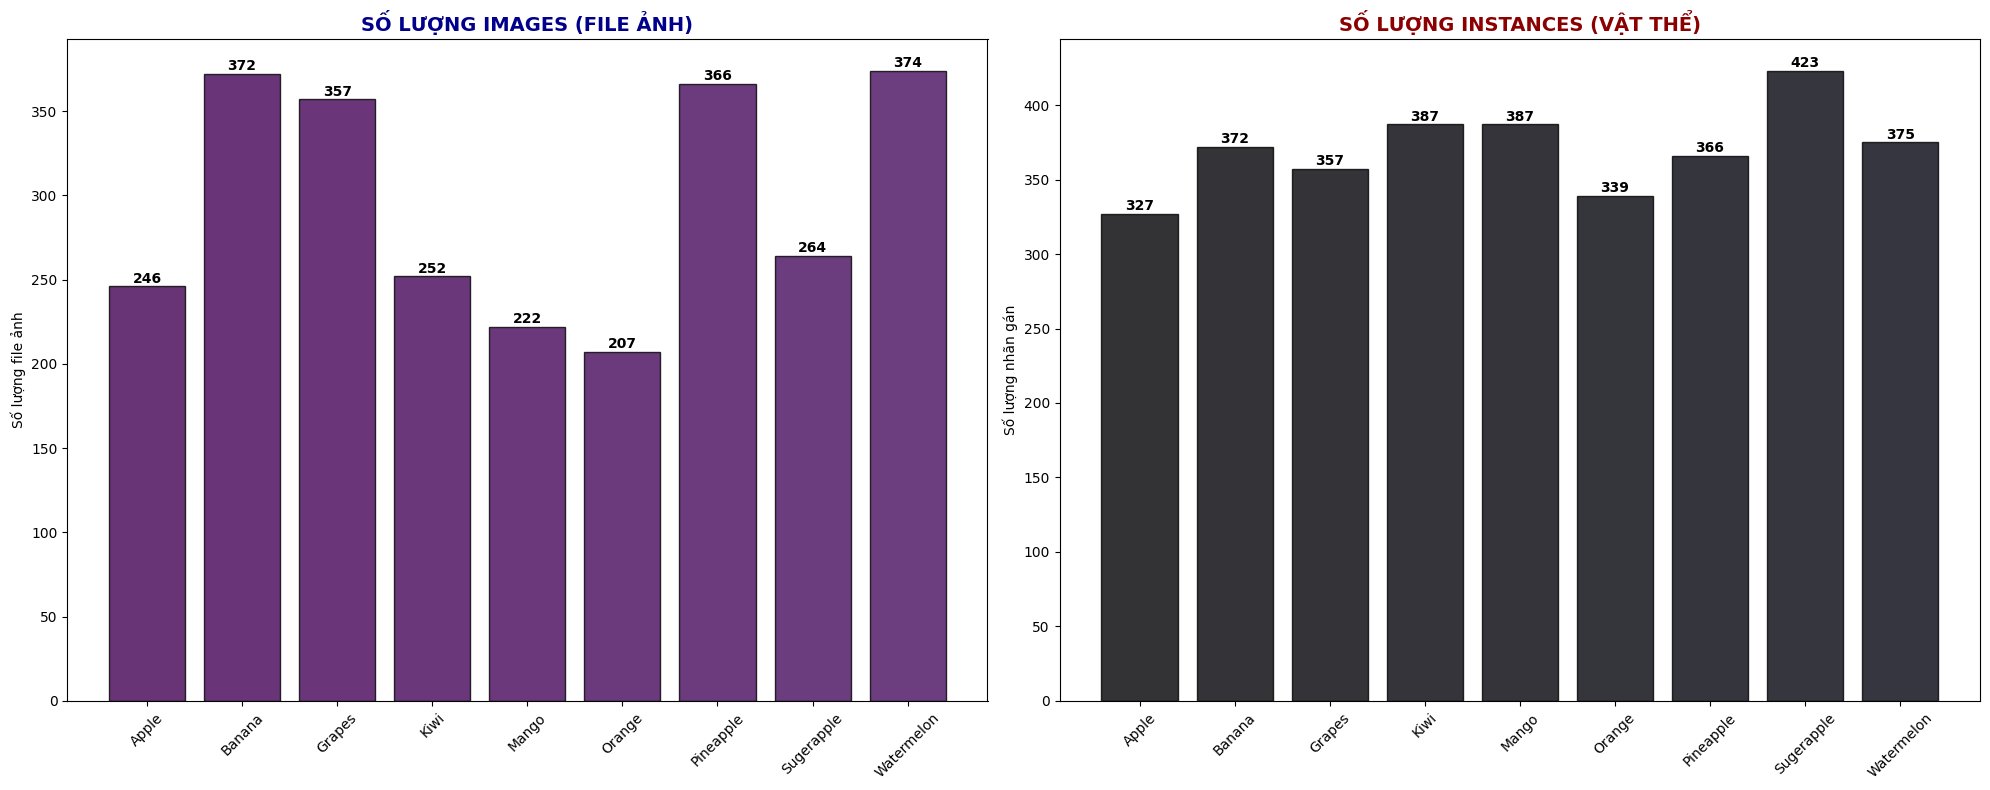

In [ ]:
import os
import yaml
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# 1. Lấy đường dẫn thư mục hiện tại
current_dir = os.getcwd() 
dataset_path = os.path.join(current_dir, 'fruit_espcam')
yaml_path = os.path.join(dataset_path, 'data.yaml')

if not os.path.exists(yaml_path):
    print(f"Lỗi: Không tìm thấy file tại {yaml_path}")
else:
    with open(yaml_path, 'r', encoding='utf-8') as f:
        data_info = yaml.safe_load(f)
        class_names = data_info['names']

    def count_images_and_instances(label_dir):
        instance_counts = Counter()
        image_counts = Counter()
        if not os.path.exists(label_dir):
            return image_counts, instance_counts
        
        for label_file in os.listdir(label_dir):
            if label_file.endswith('.txt'):
                with open(os.path.join(label_dir, label_file), 'r') as f:
                    lines = f.readlines()
                    classes_in_this_image = set()
                    for line in lines:
                        if line.strip():
                            class_id = int(line.split()[0])
                            instance_counts[class_id] += 1
                            classes_in_this_image.add(class_id)
                    for class_id in classes_in_this_image:
                        image_counts[class_id] += 1
        return image_counts, instance_counts

    # Đếm trên tập train
    train_label_dir = os.path.join(dataset_path, 'train', 'labels')
    img_stats, inst_stats = count_images_and_instances(train_label_dir)

    if not inst_stats:
        print("Không tìm thấy dữ liệu nhãn.")
    else:
        available_classes = sorted(inst_stats.keys())
        names = [class_names[i] for i in available_classes]
        counts_inst = [inst_stats[i] for i in available_classes]
        counts_img = [img_stats[i] for i in available_classes]

        # 2. Tạo bảng màu riêng biệt cho mỗi cột (dùng colormap 'tab10' hoặc 'hsv')
        # Mỗi loại quả sẽ có một màu cố định trên cả 2 biểu đồ
        colors = plt.cm.get_cmap('tab10', len(names)).colors 

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

        # Biểu đồ 1: Số lượng Images
        bars1 = ax1.bar(names, counts_img, color=colors, edgecolor='black', alpha=0.8)
        ax1.set_title('SỐ LƯỢNG IMAGES (FILE ẢNH)', fontsize=14, fontweight='bold', color='darkblue')
        ax1.set_ylabel('Số lượng file ảnh', fontweight='bold')
        ax1.tick_params(axis='x', rotation=45)
        ax1.grid(axis='y', linestyle='--', alpha=0.5)

        # Biểu đồ 2: Số lượng Instances
        bars2 = ax2.bar(names, counts_inst, color=colors, edgecolor='black', alpha=0.8)
        ax2.set_title('SỐ LƯỢNG INSTANCES (VẬT THỂ)', fontsize=14, fontweight='bold', color='darkred')
        ax2.set_ylabel('Số lượng nhãn gán', fontweight='bold')
        ax2.tick_params(axis='x', rotation=45)
        ax2.grid(axis='y', linestyle='--', alpha=0.5)

        # Hiển thị số liệu trên đầu cột
        for ax, bars in zip([ax1, ax2], [bars1, bars2]):
            for bar in bars:
                yval = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), 
                        ha='center', va='bottom', fontweight='bold', fontsize=11)

        plt.suptitle(f'THỐNG KÊ CHI TIẾT DATASET: {len(names)} LOẠI QUẢ', fontsize=18, fontweight='bold', y=1.02)
        plt.tight_layout()
        plt.show()